In [30]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
import datetime
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [17]:
df = pd.read_excel("data.xlsx")

In [18]:
df.isna().sum()

Date/Time        0
Constraint DA    0
Constraint RT    0
Wind             5
Solar            1
AEP Load         0
ATSI Load        0
COMED Load       0
DOM Load         0
dtype: int64

In [19]:
df = df.fillna(method='ffill')

In [20]:
df.isna().sum()


Date/Time        0
Constraint DA    0
Constraint RT    0
Wind             0
Solar            0
AEP Load         0
ATSI Load        0
COMED Load       0
DOM Load         0
dtype: int64

In [21]:
# Feature Engineering
df['hour'] = df['Date/Time'].dt.hour
df['day_of_week'] = df['Date/Time'].dt.dayofweek
df["month"] = df["Date/Time"].dt.month_name()

In [22]:
df.head()

,Date/Time,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load,hour,day_of_week,month
0,2021-07-01 01:00:00,0.0,0.0,753.281,0.0,14236,7455,11651,14123,1,3,July
1,2021-07-01 02:00:00,0.0,0.0,738.755,0.0,13636,7091,10871,13345,2,3,July
2,2021-07-01 03:00:00,0.0,0.0,724.276,0.0,13171,6850,10313,12765,3,3,July
3,2021-07-01 04:00:00,0.0,0.0,752.041,0.0,12962,6714,9925,12393,4,3,July
4,2021-07-01 05:00:00,0.0,0.0,759.611,0.0,13060,6730,9731,12293,5,3,July


In [23]:
df.describe()

,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load,hour,day_of_week
count,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000
mean,-38.573711,-49.394247,2757.547343,753.184830,14565.183835,7671.254471,11293.011320,12668.480190,11.497849,3.006566
std,115.701292,216.464412,2008.500334,963.148803,2355.529217,1380.445211,2476.481713,2492.093186,6.923662,1.991195
min,-1737.120000,-1920.610000,119.755000,0.000000,9200.000000,5201.000000,7346.000000,8425.000000,0.000000,0.000000
25%,0.000000,0.000000,1123.795000,0.000000,12930.000000,6668.000000,9492.000000,10914.000000,5.000000,1.000000
50%,0.000000,0.000000,2220.221000,22.752000,14203.000000,7443.000000,10762.000000,12135.000000,11.000000,3.000000
75%,0.000000,0.000000,4054.887000,1558.308000,15947.000000,8345.000000,12353.000000,14010.000000,17.000000,5.000000
max,0.000000,0.000000,9110.341000,3138.696000,22122.000000,12796.000000,20388.000000,20213.000000,23.000000,6.000000


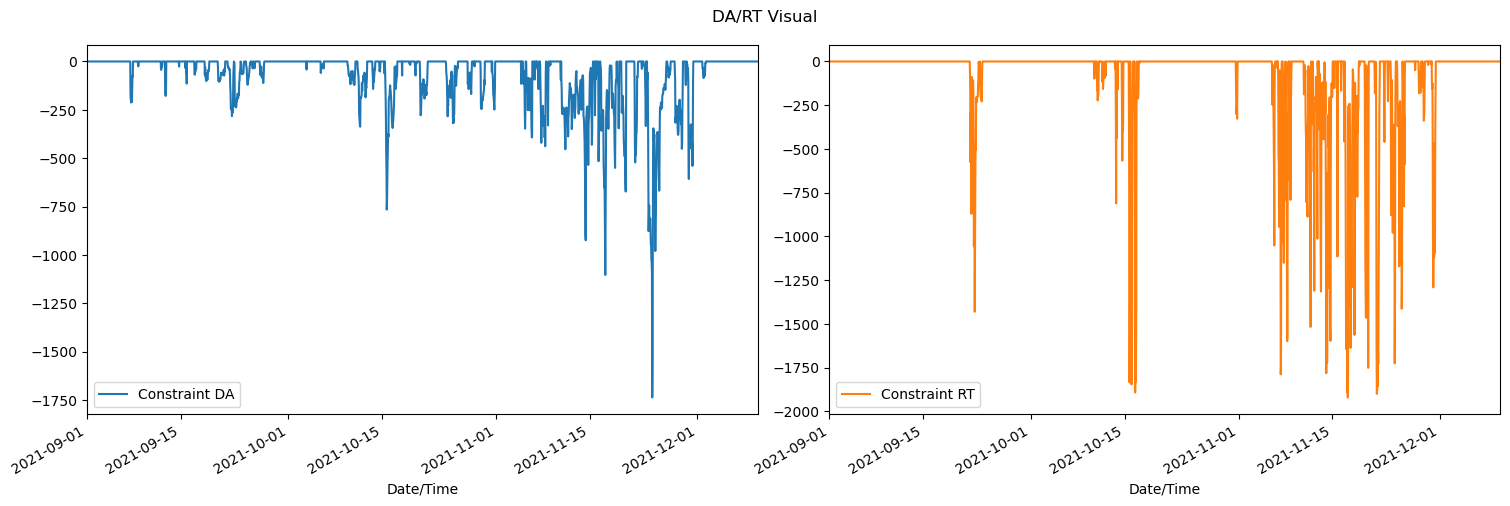

In [24]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

load_cols = ['Constraint DA', 'Constraint RT']

df.set_index('Date/Time')[load_cols].plot(subplots=True, layout=(-1, 2), figsize=(15, 5), title="DA/RT Visual")
plt.tight_layout()

start_date = datetime.datetime(2021, 9, 1)
end_date = datetime.datetime(2021, 12, 10)
plt.xlim([start_date, end_date])

plt.show()


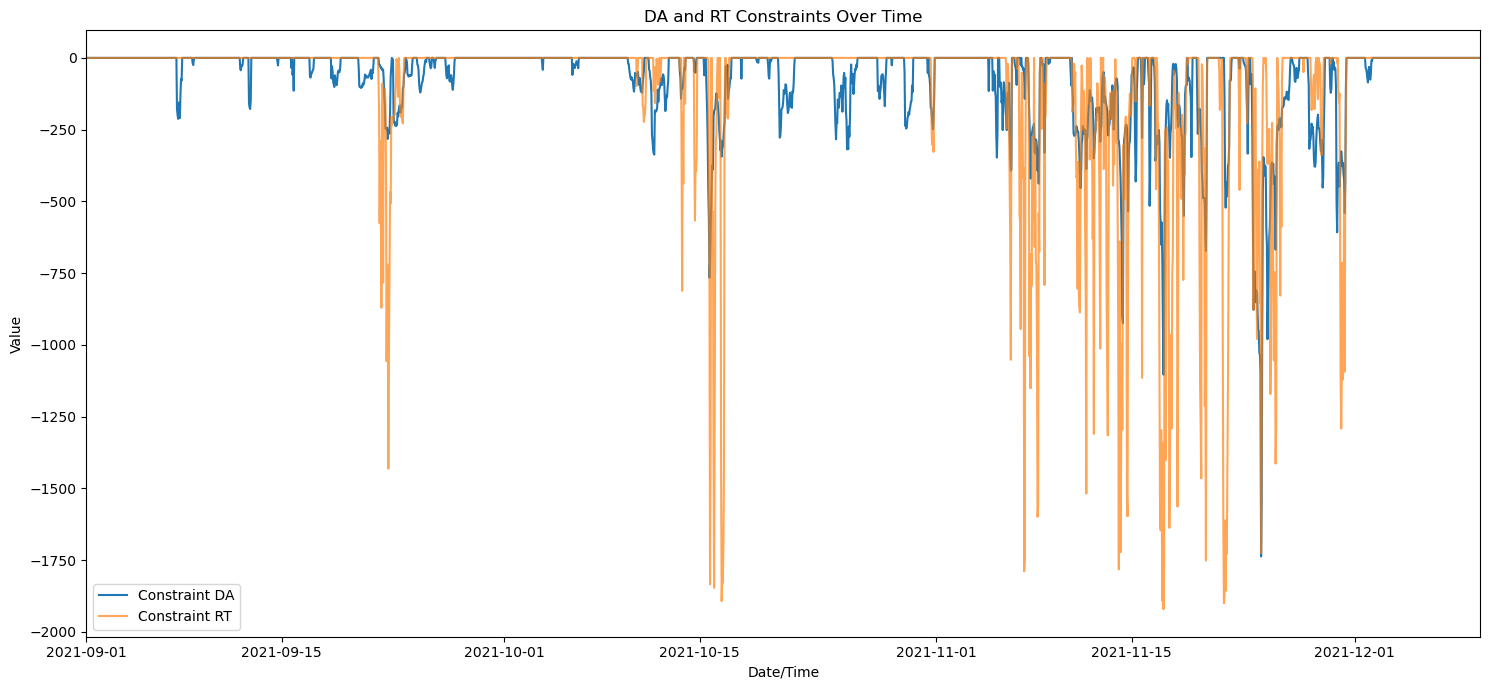

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date/Time'], df['Constraint DA'], label='Constraint DA')
plt.plot(df['Date/Time'], df['Constraint RT'], label='Constraint RT', alpha=0.7)
plt.title('DA and RT Constraints Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Value')
plt.legend(loc='best')
start_date = datetime.datetime(2021, 9, 1)
end_date = datetime.datetime(2021, 12, 10)
plt.xlim([start_date, end_date])
plt.tight_layout()
plt.show()


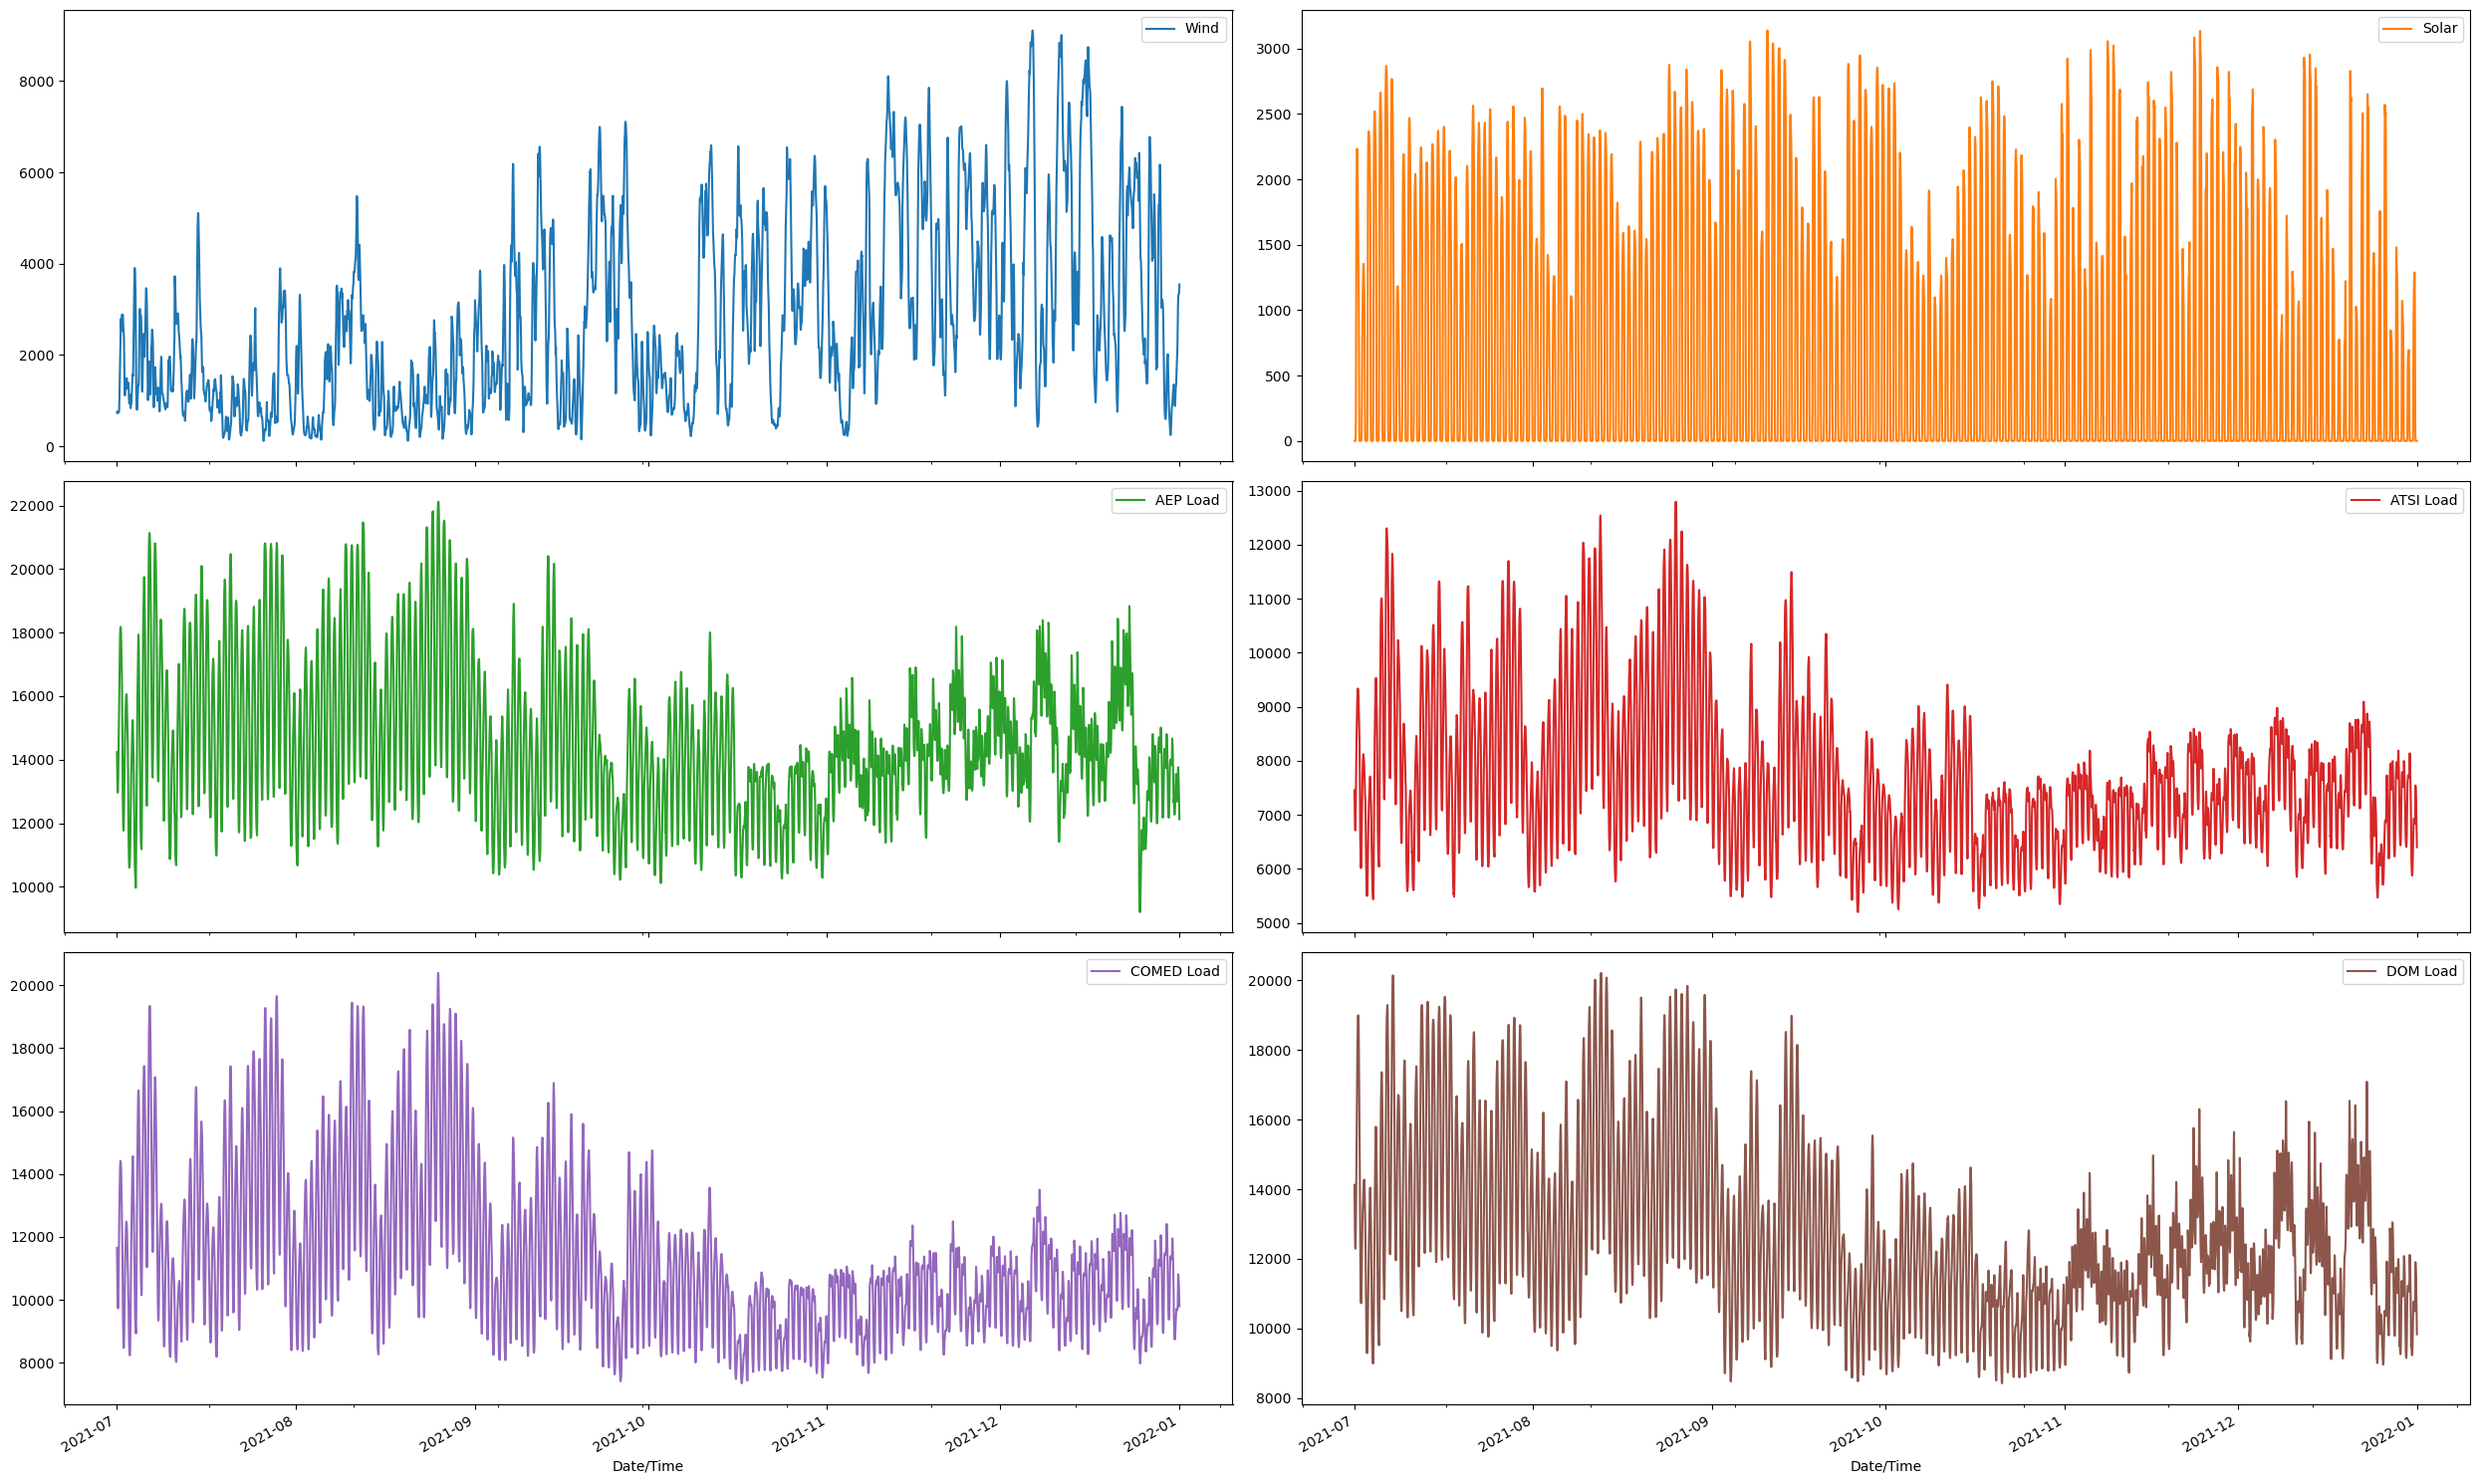

In [26]:
load_cols = ['Wind', 'Solar', 'AEP Load', 'ATSI Load', 'COMED Load', 'DOM Load']

df.set_index('Date/Time')[load_cols].plot(subplots=True, layout=(-1, 2), figsize=(25, 15))

plt.tight_layout()
plt.show()


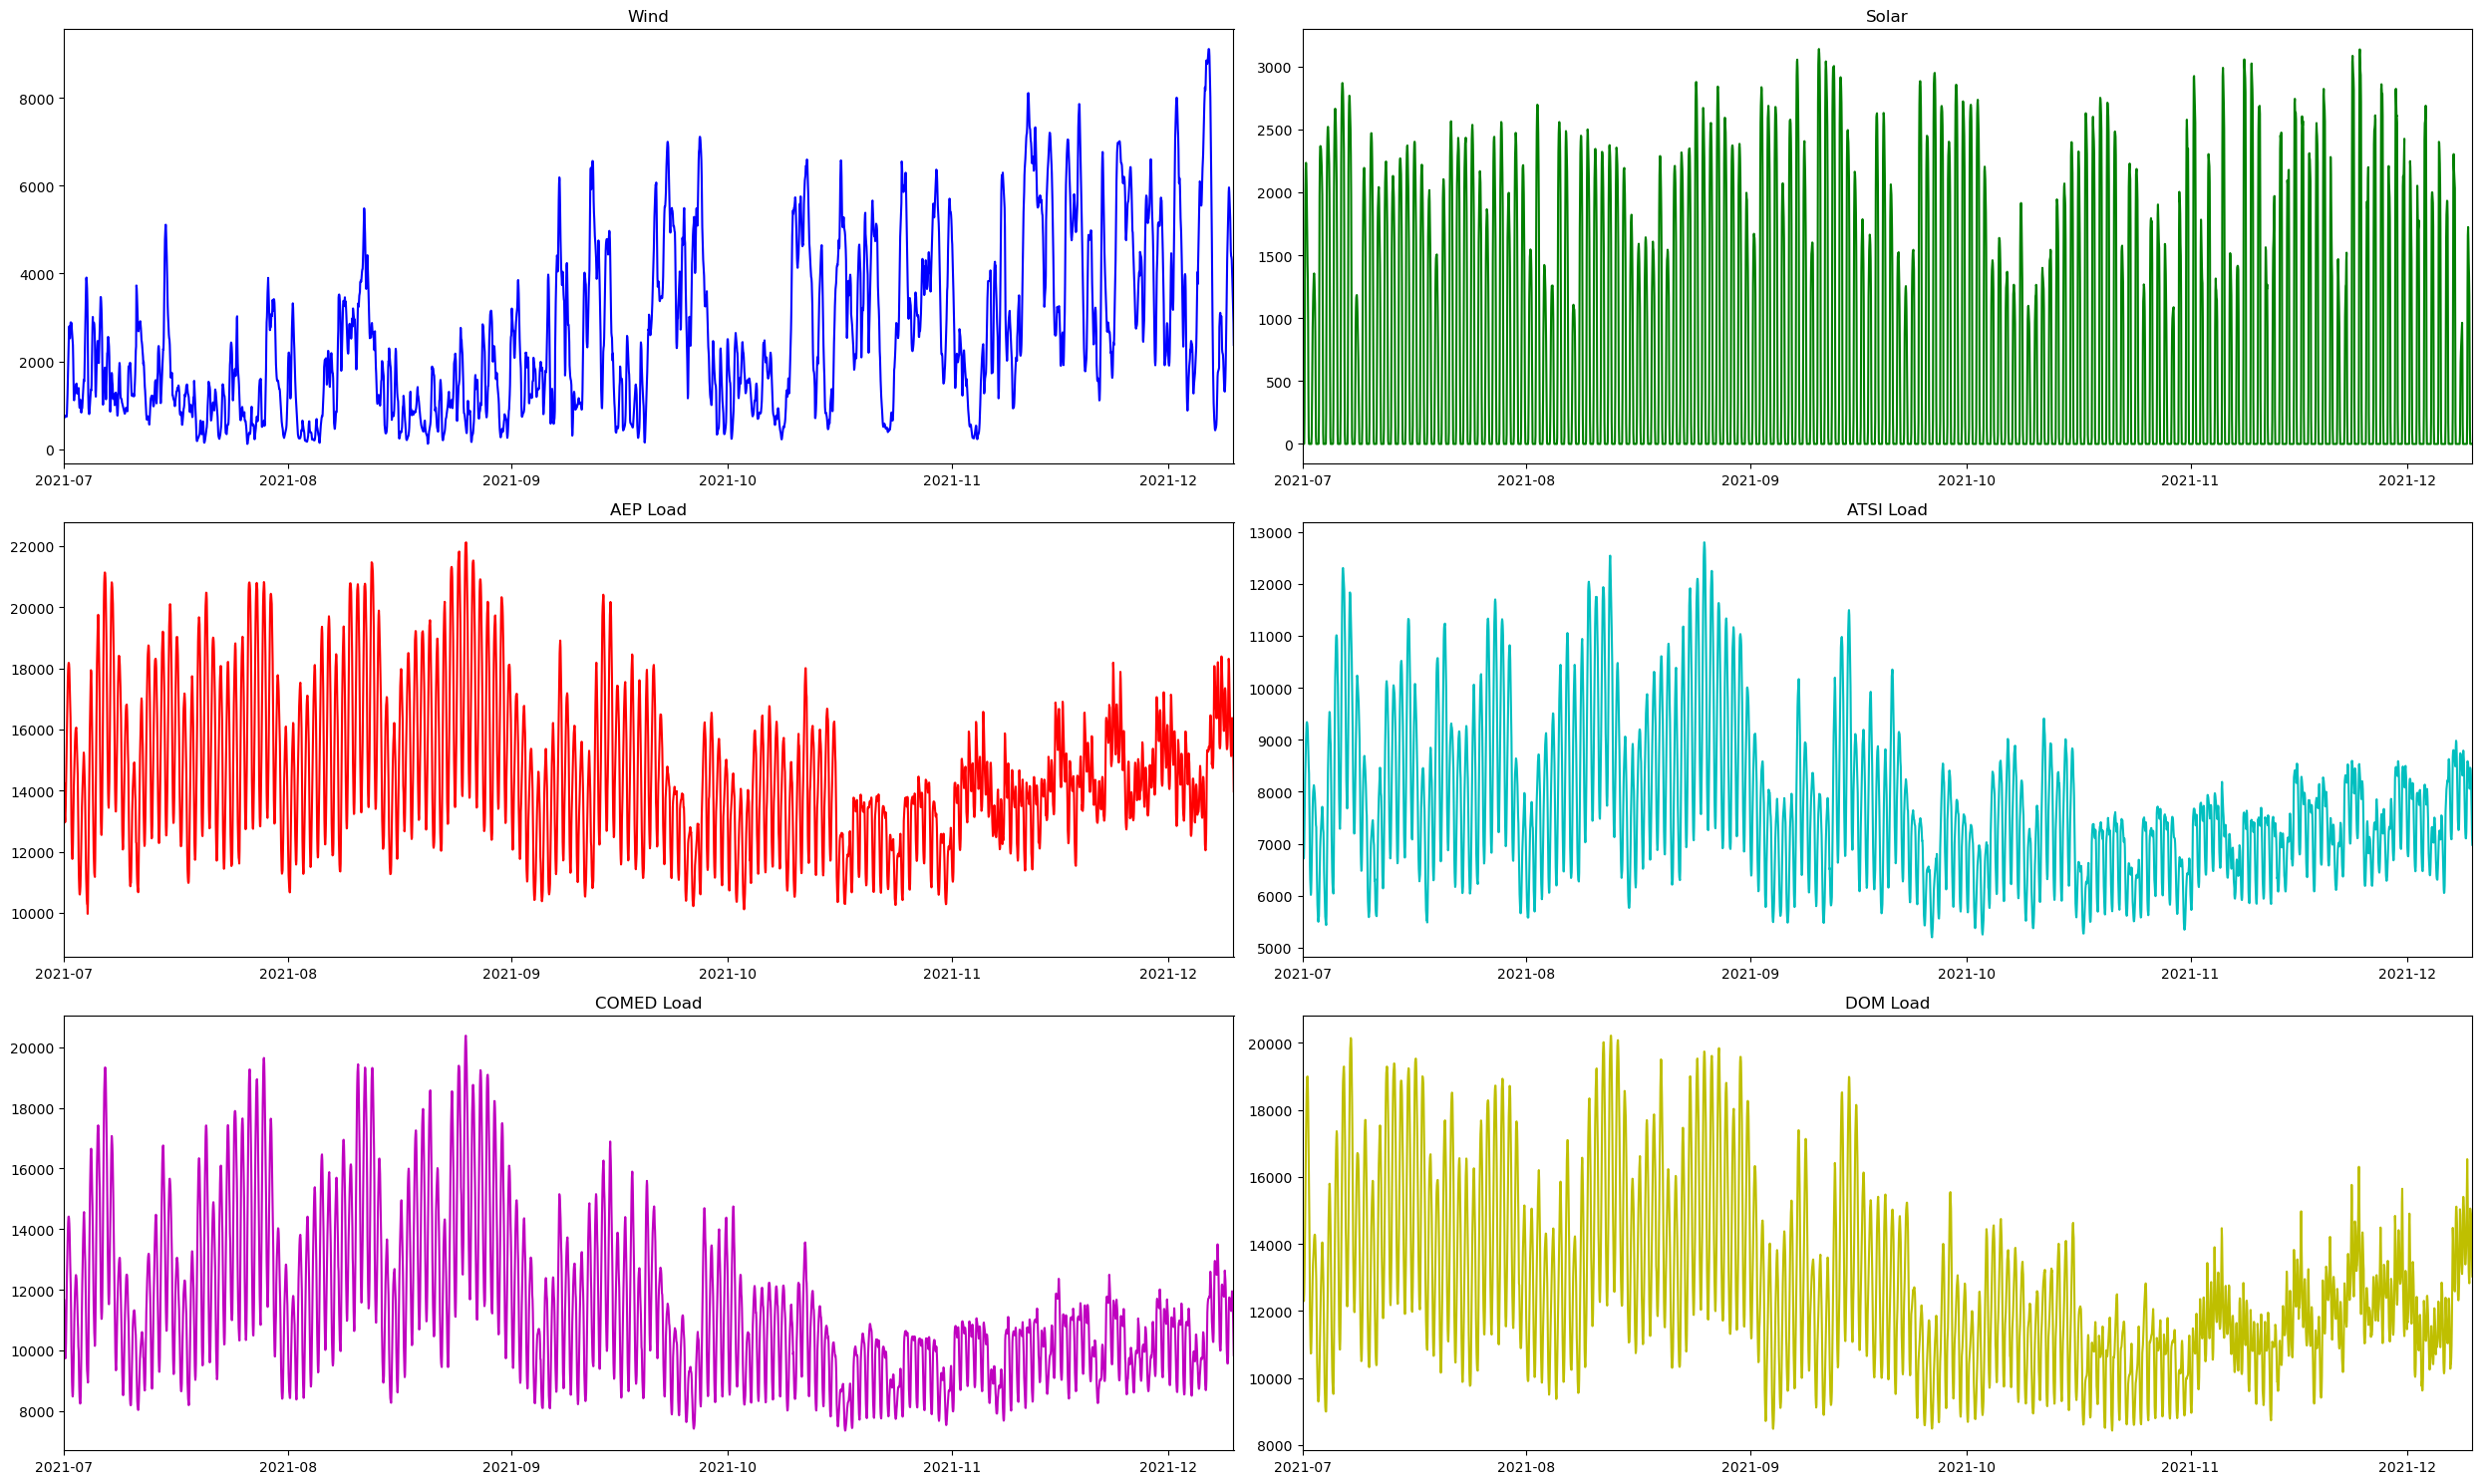

In [27]:
load_cols = ['Wind', 'Solar', 'AEP Load', 'ATSI Load', 'COMED Load', 'DOM Load']

colors = ['b', 'g', 'r', 'c', 'm', 'y']

fig, axs = plt.subplots(len(load_cols)//2, 2, figsize=(25, 15))  # Create a grid of 
axs = axs.ravel()  # Flatten the grid into a 1D array to iterate over

start_date = datetime.datetime(2021, 7, 1)
end_date = datetime.datetime(2021, 12, 10)

for i, col in enumerate(load_cols):
    axs[i].plot(df['Date/Time'], df[col], color=colors[i % len(colors)])  # Use a different color for each plot
    axs[i].set_title(col)  # Set the title for each subplot
    axs[i].set_xlim([start_date, end_date])  # Set the x-axis limits for each subplot

plt.tight_layout()
plt.show()


## Other Plots

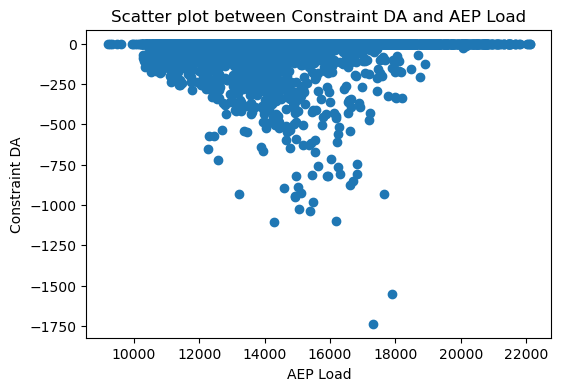

In [28]:
# Create a scatter plot for 'Constraint DA' and 'AEP Load'
plt.figure(figsize=(6, 4))
plt.scatter(df['AEP Load'], df['Constraint DA'])
plt.xlabel('AEP Load')
plt.ylabel('Constraint DA')
plt.title('Scatter plot between Constraint DA and AEP Load')
plt.show()


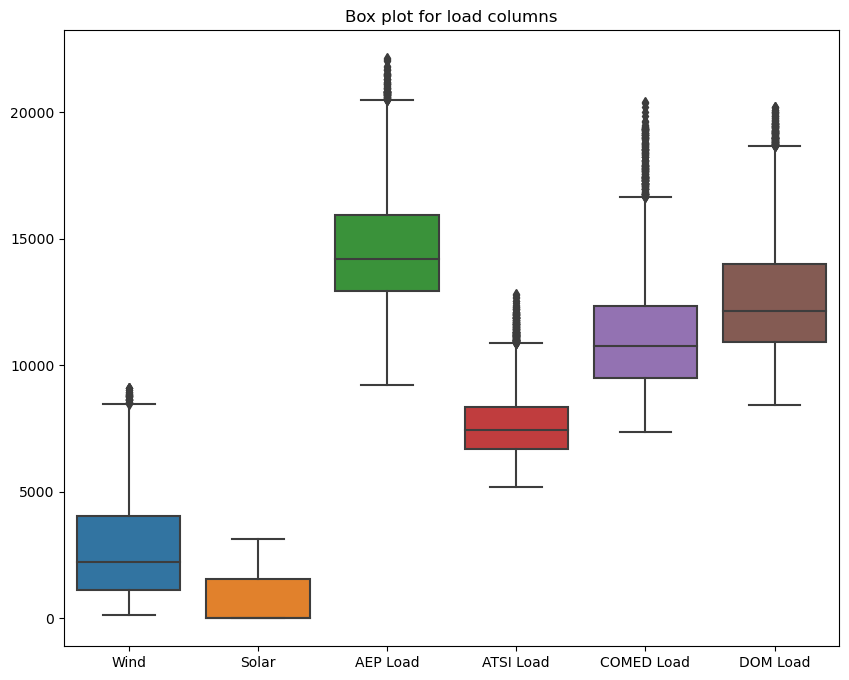

In [31]:
# Boxplot for load columns
plt.figure(figsize=(10, 8))
sms.boxplot(data=df[load_cols])
plt.title('Box plot for load columns')
plt.show()


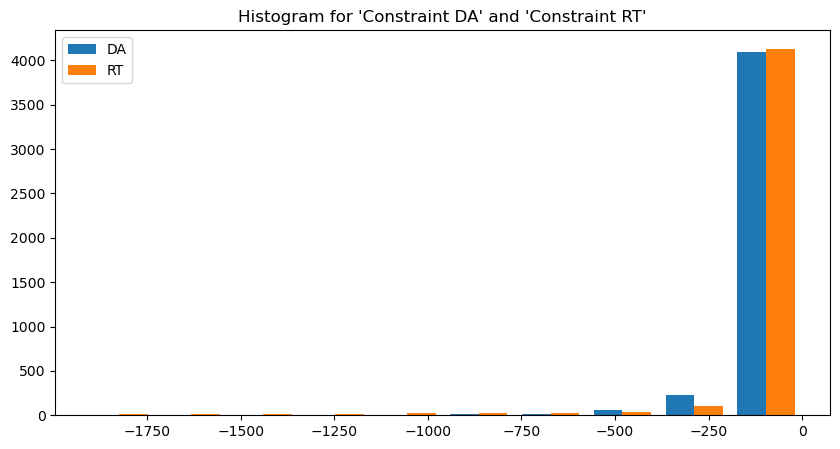

In [ ]:
# Histogram for 'Constraint DA' and 'Constraint RT'
plt.figure(figsize=(10, 5))
plt.hist(df[['Constraint DA', 'Constraint RT']])
plt.legend(["DA", "RT"])
plt.title("Histogram for 'Constraint DA' and 'Constraint RT'")
plt.show()


C:\Users\William Hazen\AppData\Local\Temp\ipykernel_11280\517219142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


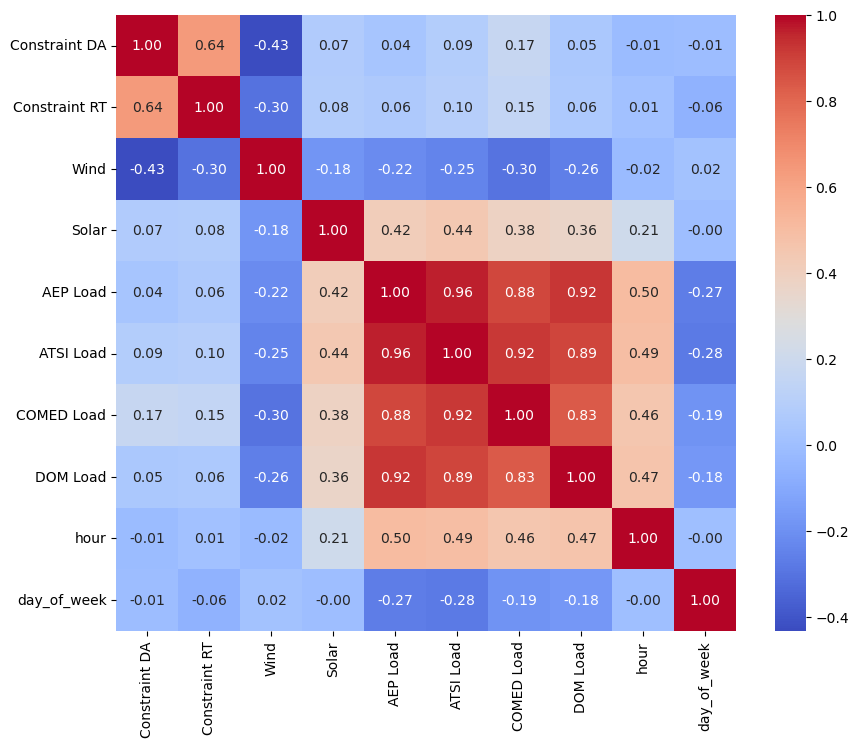

In [33]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sms.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


# Testing for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Ho: It is non stationary
# H1: It is stationary
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value',
              '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [ ]:
adfuller_test(df['Constraint DA'])


ADF Test Statistic : -6.610039001653793
p-value : 6.411176517556501e-09
#Lags Used : 31
Number of Observations Used : 4385
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df['Constraint RT'])

ADF Test Statistic : -7.707404867001107
p-value : 1.2906000226292755e-11
#Lags Used : 29
Number of Observations Used : 4387
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


- It appears that for both constraints (DA/RT) are stationary timeseries. This indicated that one whose properties do not depend on the time at which the series is observe.

- However, when looking that the plots. DA and RT only show non-zero values between September to December. Not sure the reason for this but it could be related to seasonal relationships - indicating non startionary timeseries

# Differencing 

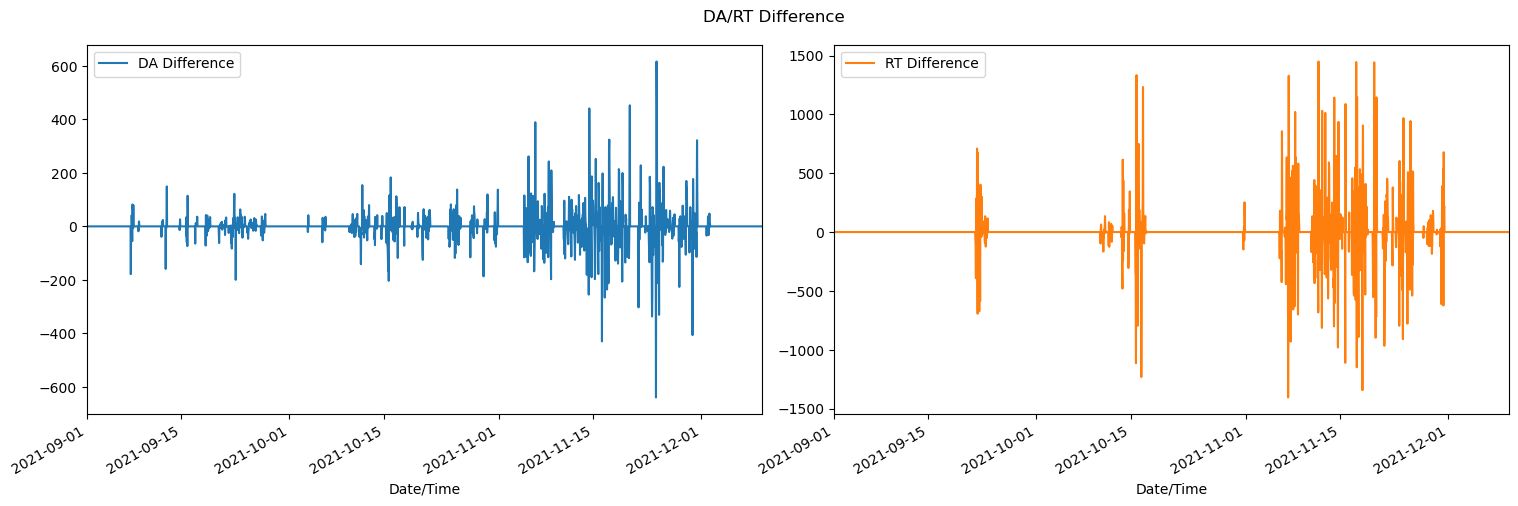

In [ ]:
df['DA Difference'] = df['Constraint DA'] - df['Constraint DA'].shift(1)
df['RT Difference'] = df['Constraint RT'] - df['Constraint RT'].shift(1)

load_cols = ['DA Difference', 'RT Difference']

df.set_index('Date/Time')[load_cols].plot(subplots=True,
                                          layout=(-1, 2), figsize=(15, 5), title="DA/RT Difference")
plt.tight_layout()

start_date = datetime.datetime(2021, 9, 1)
end_date = datetime.datetime(2021, 12, 10)
plt.xlim([start_date, end_date])

plt.show()


# AR Model

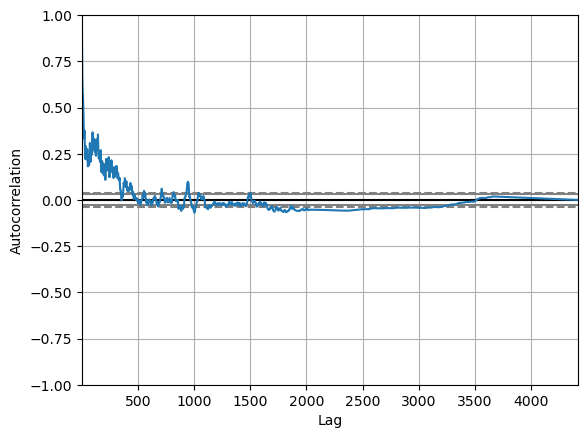

In [ ]:
pd.plotting.autocorrelation_plot(df['Constraint DA'])
plt.show()


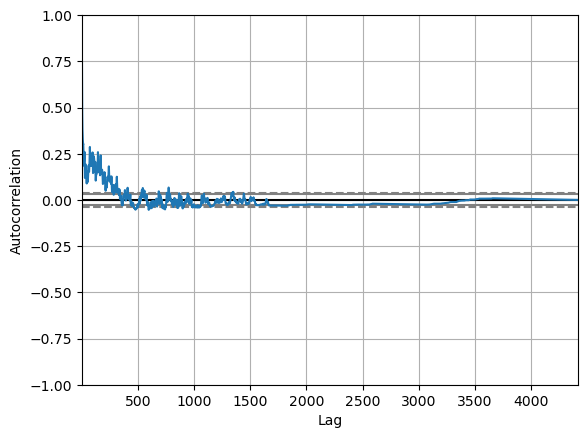

In [ ]:
pd.plotting.autocorrelation_plot(df['Constraint RT'])
plt.show()
